Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 02: Basic statistics



Don't forget to give us **2 points** for nice coding style!

## Assignment 0: Peer review for sheet 01 [3 pts]

Beginning this week you will have to make a peer review of the other groups' solutions. Each group reviews the solutions of two other groups and give points according to the given point distribution considering the correctness of the solution. For this reviews the tutors will give you up to 3 points each week.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 10, 7 | 4, 9  | 1, 4  | 11, 1 | 8, 11 | 5, 3  | 9, 10 | 6, 5  | 3, 2  | 2, 8   | 7, 6   |

## Assignment 1: Dataframes [4 pts]
### Import libraries

In [23]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
sns.set()

### a) Importing a csv file [2 pts]

In [24]:
PATH = os.getcwd()+ "/Data/Group_7"
all_files = glob.glob(os.path.join(PATH, "*.csv"))  
df_concatenated  =pd.concat([pd.read_csv(f) for f in all_files], ignore_index=True, sort=False)
df_concatenated.reset_index(drop=True, inplace=True)
df_concatenated["SubjectID"] = df_concatenated.SubjectID.transform(lambda x: x + 7000)

#playing around with display options
pd.set_option('mode.sim_interactive', True) # you can scroll all the data
pd.set_option('expand_frame_repr', True)
pd.set_option('display.max_rows', len(df_concatenated))

# save concatenated dataframe
DATAPATH = os.getcwd() + '/Processed/data_concatenated.csv'
directory = "./Processed" 
try:
    # Create the Directory
    os.mkdir(directory)
    #if it already exists, function os.mkdir throws an error
except FileExistsError:
   pass  

df_concatenated.to_csv(DATAPATH)

#Print dataFrame
df_concatenated 

,SubjectID,StimulusType,response,RT
0,7008,1,1,521
1,7008,1,1,237
2,7008,1,1,863
3,7008,1,1,762
4,7008,1,1,923
5,7008,1,1,658
6,7008,1,1,849
7,7008,1,1,657
8,7008,1,1,428
9,7008,1,1,514


### b) Working with dataframes [2 pts]

In [3]:
# add a column "congruence"
df_concatenated["congruence"]  = df_concatenated["StimulusType"]==df_concatenated["response" ]

## Create a new dataframe with averaged data
key=['SubjectID','StimulusType']
metric = ['RT', 'congruence']
df_concatenated_avg =df_concatenated.groupby(key)[metric].mean().reset_index()#dataFrame.mean() drops null values by default
#rename 'congruence' to 'accuracy'
df_concatenated_avg.rename(columns={'congruence':'accuracy'}, inplace=True)

# save averaged dataframe
DATAPATH = os.getcwd() + '/Processed/data_concatenated_averaged.csv'
df_concatenated_avg.to_csv(DATAPATH)
#check if everything works
df_concatenated_avg.head()

,SubjectID,StimulusType,RT,accuracy
0,7001,0,109.1000,0.4000
1,7001,1,293.4500,0.9875
2,7002,0,125.4500,0.5500
3,7002,1,311.6625,0.8875
4,7003,0,19.0500,0.9500


## Assignment 2: Statistical plotting [6 pts]

### a) Boxplot and Violinplot [2 pts]

Plot the RT of each trial for all subjects as a stripplot and a boxplot on top of each other. Do the same with a striplot and a violinplot. Plot go trials as green dots and no-go trails as red dots. Reminder: don't forget to mask the data where RT=0. Make sure that the legends are informative (Don't display duplicated legends).

### Prepapre data for plotting by masking rows with "0" values

In [47]:
g = np.nonzero(df_concatenated["RT"]) #show row indicies where RT !=0
group_data_plt = df_concatenated.loc[g] # select rows, where RT !=0

### Plotting

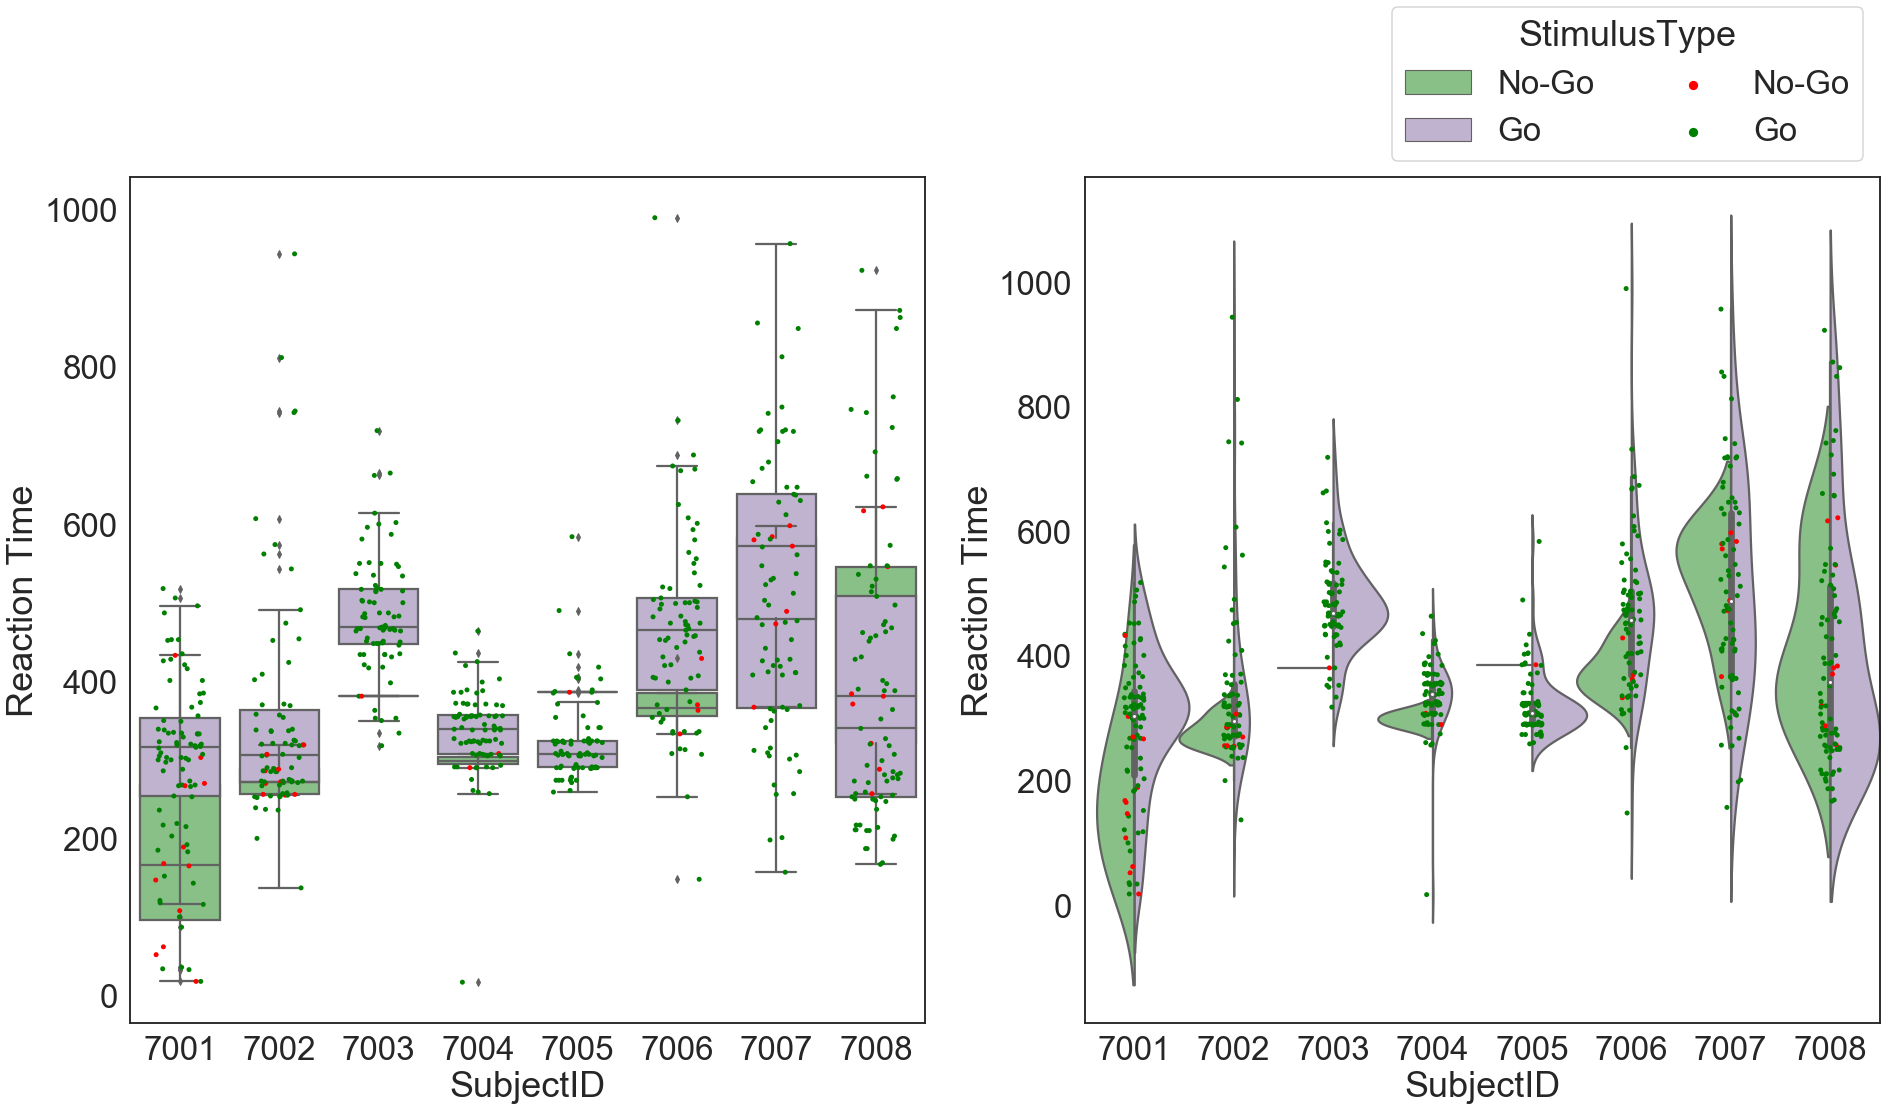

In [22]:
sns.set(context = "talk", style="white", palette="Accent", font_scale=2,
        rc={'figure.figsize':(27,14)})

# stripplot and boxplot
plt.subplot(1,2,1)
a = sns.stripplot(data = group_data_plt , x='SubjectID', y='RT',
              hue = "StimulusType",
              palette = {1:"green", 0:"red"},
              jitter=0.25)
b = sns.boxplot(data = group_data_plt , x='SubjectID', y='RT', 
            dodge=False,
            hue = "StimulusType")
plt.ylabel("Reaction Time")

#stripplot and violinplot
plt.subplot(1,2,2)
c = sns.stripplot(data = group_data_plt , x='SubjectID', y='RT', 
              hue = "StimulusType",
              palette = {1:"green", 0:"red"})
d=sns.violinplot(data = group_data_plt , x='SubjectID', y='RT',
               dodge = True,
               hue='StimulusType',
               split=True,
               scale  = "area",
               width = 1.1)
plt.ylabel("Reaction Time")
# handling legends
#box = a.get_position()
#a.set_position([box.x0, box.y0, box.width * 0.85, box.height])
#a.legend(bbox_to_anchor=(1.1, 1.06), loc='center top', borderaxespad=0., ncol=2)
c.get_legend().set_visible(False)
box = a.get_position()
leg = a.legend(loc = 1, bbox_to_anchor=(2.2, 1.22), ncol=2)
new_title = 'StimulusType'
leg.set_title(new_title)
new_labels = ['No-Go', 'Go', 'No-Go', 'Go']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
    
    
#adjusting enviroment
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.000001, right=0.9,wspace=0.2)

### b) Violinplot combining all data of all groups [3 pts]

directory /Data/Group_8 does not contain csv files


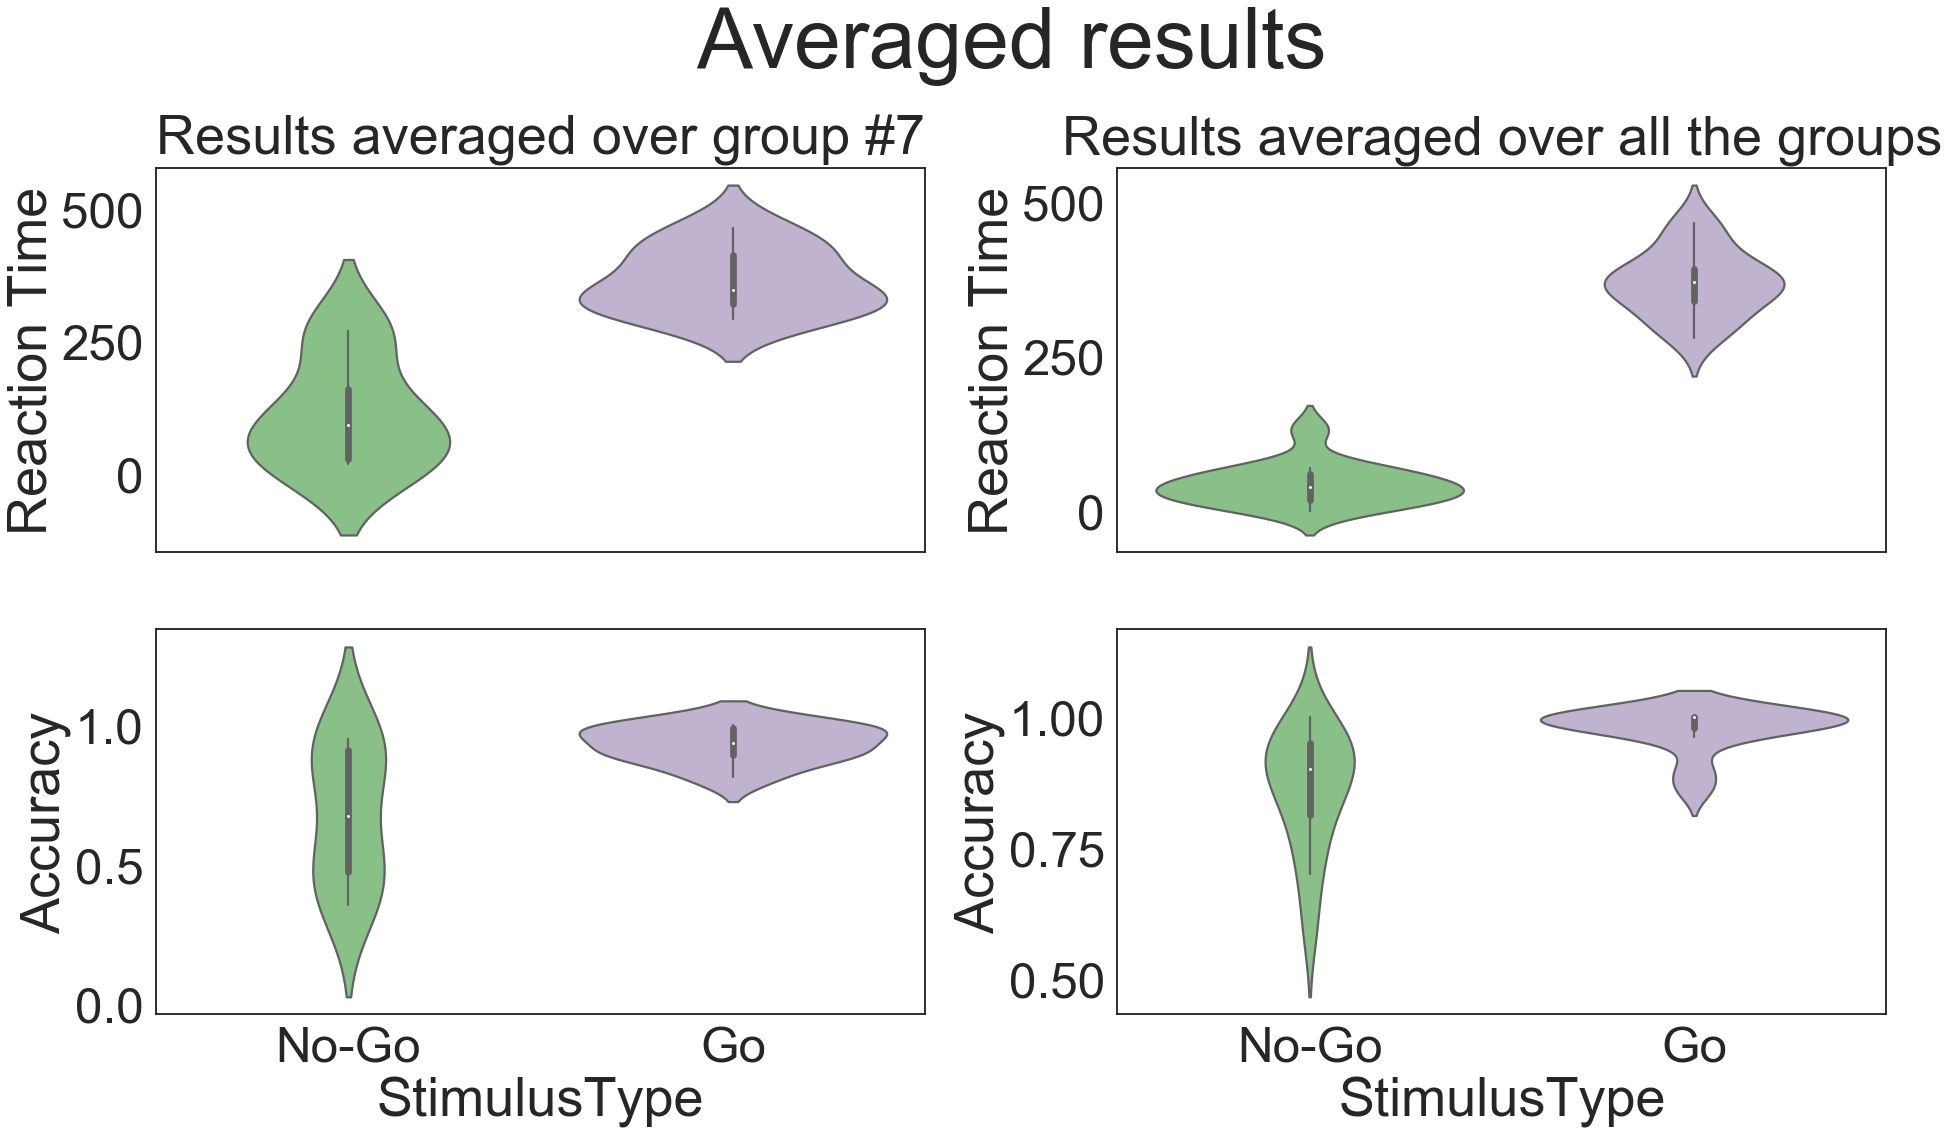

In [45]:
# again create a concatenated dataframe over all (averaged) groups.
for i in range(11):
    PATH = os.getcwd()+ "/Data/Group_"+str(i+1)
    all_files = glob.glob(os.path.join(PATH, "*.csv"))  
    try:
        d  =pd.concat([pd.read_csv(f) for f in all_files], ignore_index=True, sort=True)
        d.reset_index(drop=True, inplace=True)
        if i<9:
            d["SubjectID"] = d.SubjectID.transform(lambda x:  str((i+1)*1000)+ str(x))
        else:
            d["SubjectID"] = d.SubjectID.transform(lambda x:  str((i+1)*100)+ str(x))
        if i==0:
            df_concatenated_all = d
        else:
            df_concatenated_all = pd.concat([df_concatenated,d], ignore_index=True)
    except ValueError:
        print('directory '+ "/Data/Group_"+str(i+1) + ' does not contain csv files')
        

df_concatenated_all["congruence"]  = df_concatenated_all["StimulusType"]==df_concatenated_all["response" ]

# create a new dataframe with averaged data
df_concatenated_avg_all =df_concatenated_all.groupby(key)[metric].mean().reset_index()
df_concatenated_avg_all.rename(columns={'congruence':'accuracy'}, inplace=True)
# save averaged dataframe
DATAPATH = os.getcwd() + '/Processed/data_concatenated_averaged_all.csv'
df_concatenated_avg_all.to_csv(DATAPATH)


# Plot your results
sns.set(context = "talk", style="white", font_scale=3, palette="Accent",
        rc={'figure.figsize':(27,14)})

# violinplot group
plt.subplot(2,2,1)
plt.title("Results averaged over group #7", fontsize=54, y=1.02)
l=sns.violinplot(data = df_concatenated_avg, x="StimulusType", y = 'RT')
plt.ylabel("Reaction Time")
l.axes.get_xaxis().set_visible(False)
plt.subplot(2,2,3)
m=sns.violinplot(data = df_concatenated_avg, x = "StimulusType", y='accuracy')
m.set_xticklabels(['No-Go',"Go"])
plt.ylabel("Accuracy")

#violinplot all
plt.subplot(2,2,2)
plt.title("Results averaged over all the groups", fontsize=54, y=1.02)
n=sns.violinplot(data = df_concatenated_avg_all, x = "StimulusType", y='RT')
plt.ylabel("Reaction Time")
n.axes.get_xaxis().set_visible(False)
plt.subplot(2,2,4)
p=sns.violinplot(data = df_concatenated_avg_all, y='accuracy', x = "StimulusType")
p.set_xticklabels(['No-Go',"Go"])
plt.ylabel("Accuracy")
plt.suptitle("Averaged results", y=1.08, x = 0.45, fontsize=84)

#adjusting enviroment
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.01, right=0.9,wspace=0.25, hspace=0.2)
plt.show()

       We can see that the more data we have, the more centred are the results. In other words, the distribution of    means approaches normal distribition with subjects number increase.

### c) Scatterplot [1 pts]

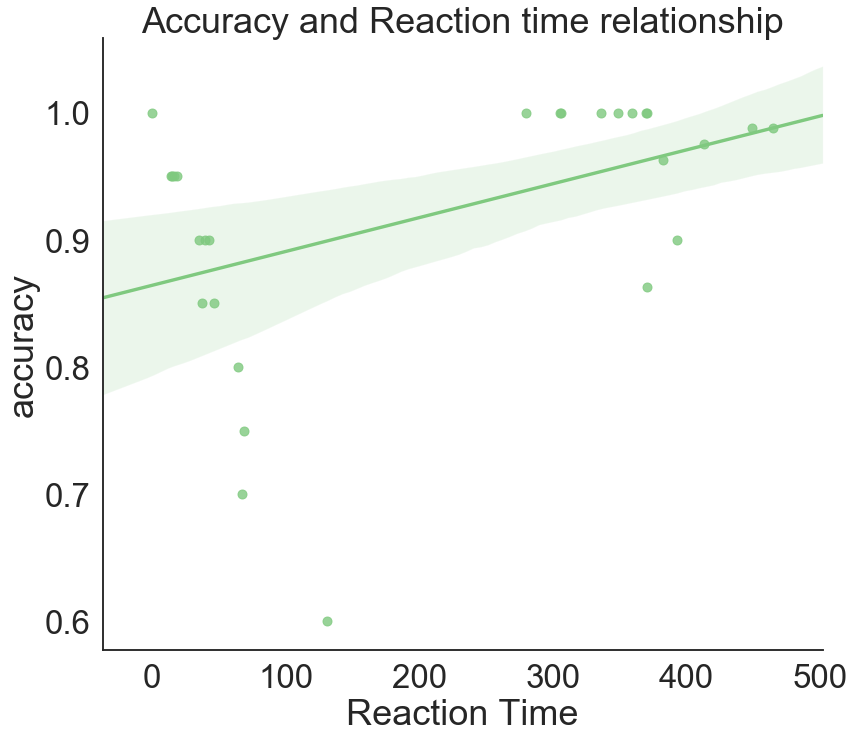

In [46]:
sns.set(context = "talk", style="white", palette="Accent", font_scale=2,
        rc={'figure.figsize':(20,20)})

f = sns.lmplot(data = df_concatenated_avg_all, x='RT', y='accuracy')
plt.title("Accuracy and Reaction time relationship", y=2.5)
plt.xlabel("Reaction Time")
#adjusting enviroment
plt.subplots_adjust(top=2.5, bottom=0.8, left=2, right=4)